In [13]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(pheatmap)
library(RColorBrewer)
library(viridis)

In [14]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [15]:
df<-read.csv("03_DEGs_and_EnrichmentAnalysis/selected_gene_CoreB.csv")
rownames(df)<-paste0(df$Flu_Day,df$Flu_Year,df$cohort.cohortGuid)


In [16]:
df_input<-t(df[5:19])


In [17]:
rownames(df_input) <- gsub("Gene_","", rownames(df_input))


In [18]:
column_labels <- c("Year 1 Day 0", "Year 1 Day 7", "Year 2 Day 0", "Year 2 Day 7", "Year 1 Day 0", "Year 1 Day 7", "Year 2 Day 0", "Year 2 Day 7")


In [19]:
# Create the annotation dataframe with only the cohort.cohortGuid
annotation_df <-df[c('cohort.cohortGuid')]

annotation_df <- annotation_df %>%
  mutate(`Age Group` = ifelse(cohort.cohortGuid	 == "BR1", "Young", "Older"))%>% select(`Age Group`)
# Set custom colors for the cohorts
annotation_colors <- list(`Age Group` = c(Young = "#35978F", Older = "#BF812D"))

In [20]:
colnames(df_input)<-paste0(df$Flu_Day,df$Flu_Year,df$cohort.cohortGuid)

In [21]:
breaks_sequence <- seq(-1, 1, length.out = 100)

png 
  2

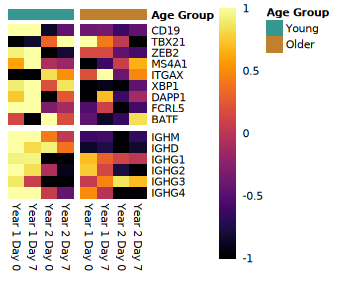

In [26]:
options(repr.plot.width = 75/25.4, repr.plot.height = 60/25.4)
heatmap_plot <- pheatmap(df_input, 
         scale = "row", 
         cluster_cols = FALSE, 
         cluster_rows = FALSE, 
         fontsize = 6,
         gaps_col = c(4),
                         gaps_row = c(9), 
          annotation_col = annotation_df,  
                         breaks=breaks_sequence,
         annotation_colors = annotation_colors,
                         border_color=NA,
         labels_col = column_labels, color= inferno(100))
save_pheatmap(heatmap_plot,'FigureF.pdf', width=75/25.4, height=60/25.4)